In [1]:
class ParseResult():
    pass


def parse_log(input_file):
    result = ParseResult()

    result.attempt_to_algos = list()
    result.algos_to_average = dict()
    result.attempts_count = 0

    result.min_n = None
    result.max_n = None
    result.min_time = None
    result.max_time = None

    current_attempt = None
    current_n = None
    
    # parse file
    for line in open(input_file):
        if line.startswith('Attempt '):
            current_attempt = int(line[len('Attempt '):])
            result.attempts_count += 1
            result.attempt_to_algos.append(dict())
        elif line.startswith('n = '):
            current_n = int(line[len('n = '):])

            if result.min_n is None or result.min_n > current_n:
                result.min_n = current_n
            if result.max_n is None or result.max_n < current_n:
                result.max_n = current_n

        elif line.startswith('time'):
            current_algo = line.split(':')[0][len('time'):]
            current_time = float(line.split(':')[1])

            if result.min_time is None or result.min_time > current_time:
                result.min_time = current_time
            if result.max_time is None or result.max_time < current_time:
                result.max_time = current_time

            result.attempt_to_algos[current_attempt - 1].setdefault(current_algo, list()).append((current_n, current_time))
           
    # calculate averages    
    algos = result.attempt_to_algos[0].keys()
    for algo in algos:
        result.algos_to_average[algo] = list()
        for i in xrange(len(result.attempt_to_algos[0][algo])):
            sum = 0.0
            for j in xrange(result.attempts_count):
                sum += result.attempt_to_algos[j][algo][i][1]
            result.algos_to_average[algo].append((result.attempt_to_algos[0][algo][i][0], sum / result.attempts_count))
    
    return result


experiment_1000_1100 = parse_log('log_attempts_10_from_1000_to_1100_step_1.txt')
experiment_1000_2000 = parse_log('log_attempts_10_from_1000_to_2000_step_10.txt')

In [2]:
%matplotlib inline
import matplotlib.pyplot as pyplot

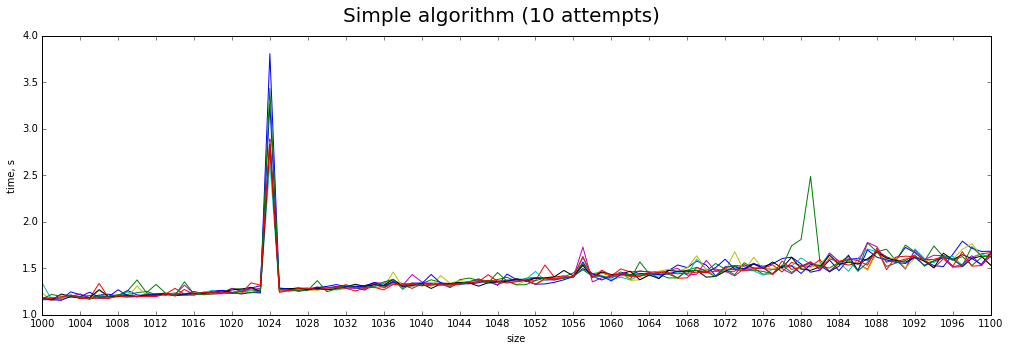

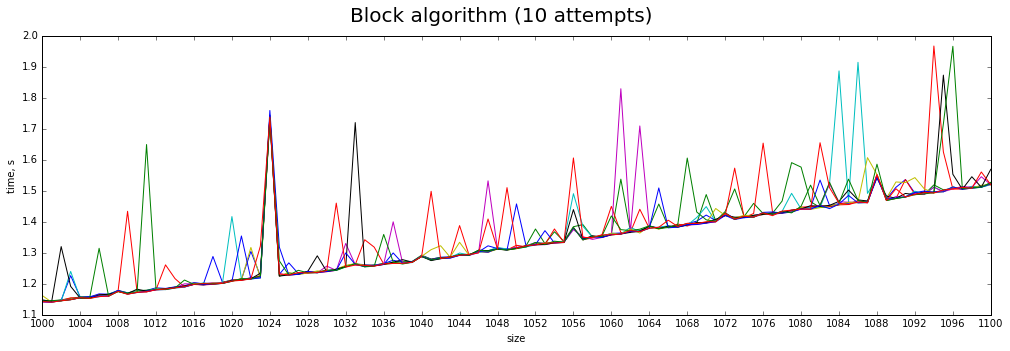

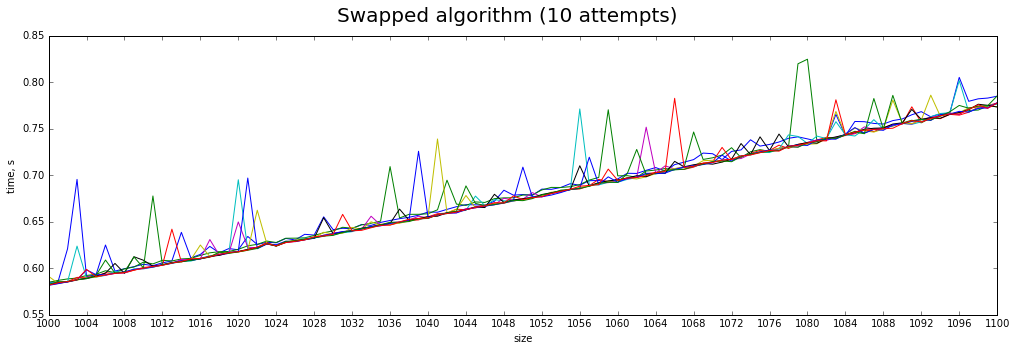

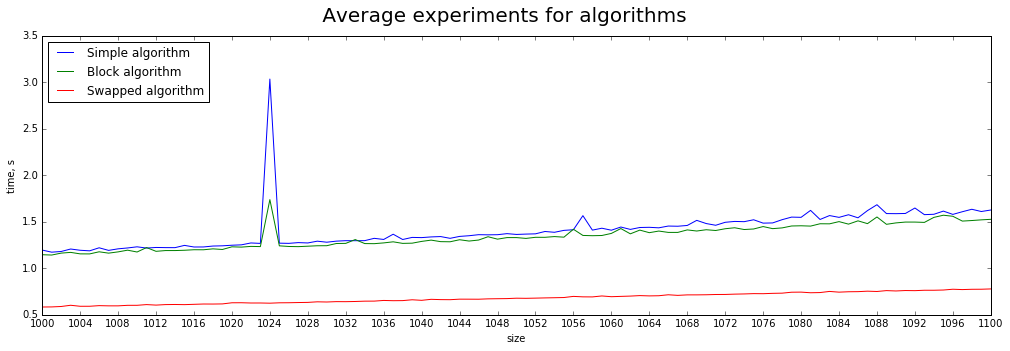

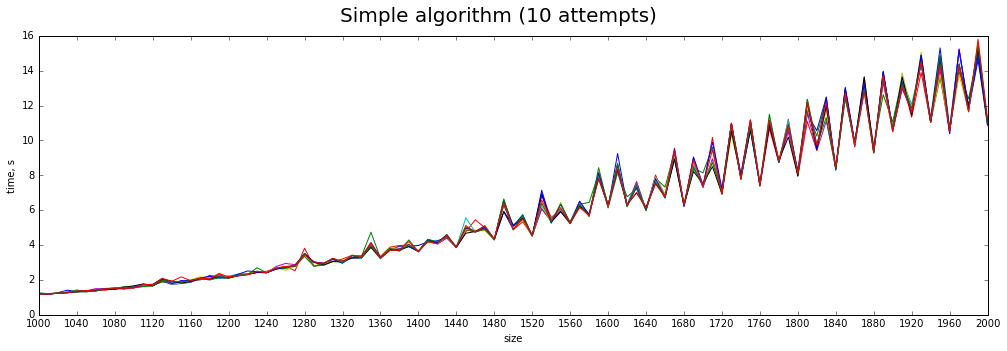

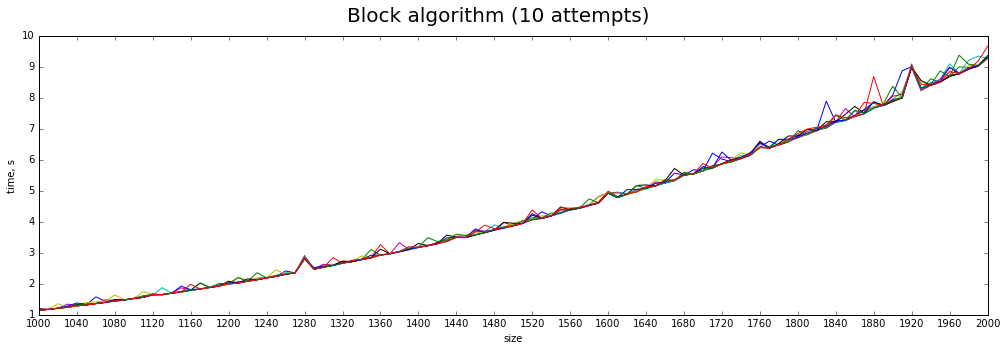

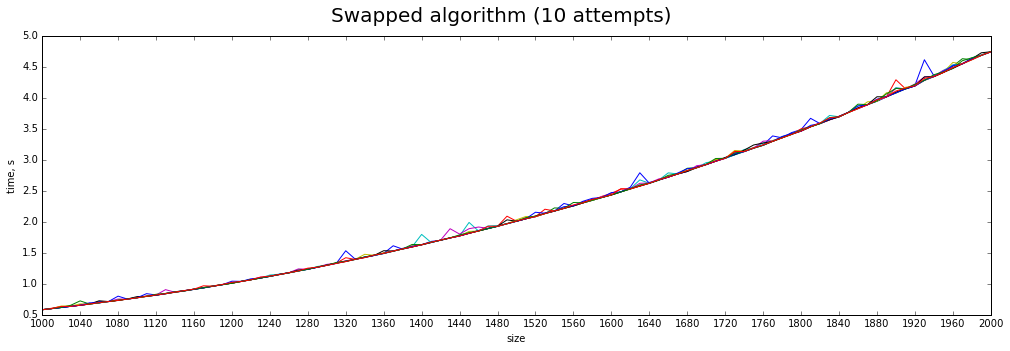

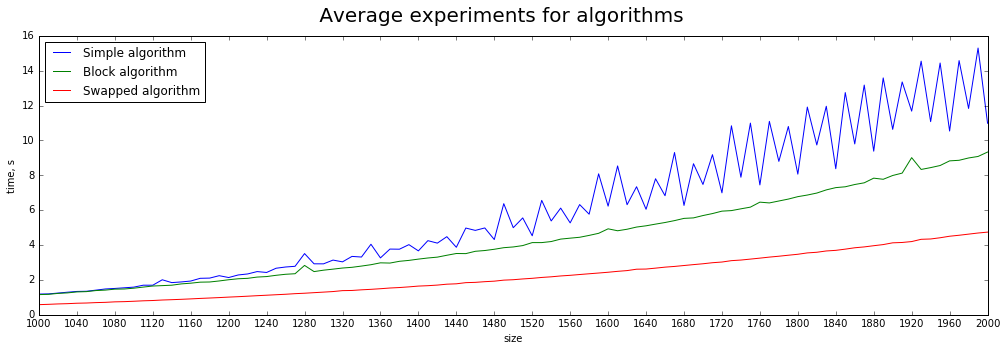

In [28]:
def draw_experiments(experiment):
    algos = experiment.attempt_to_algos[0].keys()
    for algo in algos:
        fig = pyplot.figure(figsize=(17,5), dpi=90)
        fig.suptitle(algo + ' algorithm (' + str(experiment.attempts_count) + ' attempts)' , fontsize = 20)
        for test in experiment.attempt_to_algos:
            pyplot.plot([_[0] for _ in test[algo]], [_[1] for _ in test[algo]])
        pyplot.xticks(range(experiment.min_n, experiment.max_n + 1, (experiment.max_n - experiment.min_n) // 25 ))
        pyplot.xlabel('size')
        pyplot.ylabel('time, s')
        pyplot.show()
        
    fig = pyplot.figure(figsize=(17,5), dpi=90)
    fig.suptitle(' Average experiments for algorithms' , fontsize = 20)
    ax = fig.add_subplot(111)
    for algo, average in experiment.algos_to_average.iteritems():
        ax.plot([_[0] for _ in average], [_[1] for _ in average], label = algo + ' algorithm')
    ax.legend(loc='upper left')
    ax.set_xticks(range(experiment.min_n, experiment.max_n + 1, (experiment.max_n - experiment.min_n) // 25 ))
    ax.set_xlabel('size')
    ax.set_ylabel('time, s')
    pyplot.show()

draw_experiments(experiment_1000_1100)
draw_experiments(experiment_1000_2000)